In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
%matplotlib inline

In [68]:
df = pd.read_csv('josh_final_dataset_7.14.csv')

In [69]:
del df['Unnamed: 0']

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45604 entries, 0 to 45603
Data columns (total 30 columns):
Assets                                                                                                         39525 non-null float64
adsh                                                                                                           39525 non-null object
cik                                                                                                            45604 non-null int64
coreg                                                                                                          54 non-null object
ddate                                                                                                          39525 non-null float64
ein                                                                                                            37612 non-null float64
fy                                                                                            

## Dividing (Identifying) which companies are foreign and domestic

In [71]:
df['check1']=np.where(df.IncomeLossFromContinuingOperationsBeforeIncomeTaxesForeign.isnull(),0,1)
df['check2']=np.where(df.UndistributedEarningsOfForeignSubsidiaries.isnull(),0,1)
df['check3']=np.where(df.ForeignEarningsRepatriated.isnull(),0,1)

df['check']=df['check1']+df['check2']+df['check3']

In [72]:
del df['check1']
del df['check2']
del df['check3']

In [73]:
# Giving identifiers to companies as to whether each of them has foreign subsidiary(foreign operation) or not
df['Type of Firm'] = np.where(df.check==0,'Domestic','Foreign')

In [74]:
del df['check']

## Limiting data to fixed fy years for accurate analysis + Seeing which Tag has the most number of observations

### IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest

In [75]:
# Data only from fy 2013 to fy 2016
df_13_16 = df[(df.fy>=2013) & (df.fy<=2016)]

# Drop firms that have at least one missing Asset values from fy 2013-2016
df_13_16 = df_13_16.groupby('cik').filter(lambda x: all(pd.notnull(x['Assets'])))

# Drop firms that have Asset value of 0
df_13_16 = df_13_16.groupby('cik').filter(lambda x: all(x['Assets']!=0.0))

# Drop firms that have at least one missing IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest
# values from fy 2013-2016
df_13_16 = df_13_16.groupby('cik').\
filter(lambda x: all(pd.notnull(x['IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest'])))

# Filter only the companies that have data for all fy years 2013 - 2016 (4 assets values per cik group)
df_13_16 = df_13_16.groupby('cik').filter(lambda x: x['fy'].nunique()==4)

df_13_16_foreign = df_13_16.copy()[df_13_16.copy()['Type of Firm']=='Foreign']
df_13_16_domestic = df_13_16.copy()[df_13_16.copy()['Type of Firm']=='Domestic']

As we can see below, the problem is there are some firms that was domestic one year and was multinational for another year (inconsistent). We are going to drop those companies and exclude them from the analysis

In [76]:
print("Foreign:",df_13_16_foreign.groupby('fy').size(),"\n\n","Domestic:", df_13_16_domestic.groupby('fy').size())

Foreign: fy
2013.0    158
2014.0    158
2015.0    162
2016.0    160
dtype: int64 

 Domestic: fy
2013.0    153
2014.0    153
2015.0    149
2016.0    151
dtype: int64


In [77]:
df_13_16_foreign = df_13_16_foreign.groupby('cik').filter(lambda x: x['fy'].nunique()==4)
df_13_16_domestic = df_13_16_domestic.groupby('cik').filter(lambda x: x['fy'].nunique()==4)

# Now we have the same number of multinational firms and domestic firms throughout all years
print("Foreign:",df_13_16_foreign.groupby('fy').size(),"\n\n","Domestic:", df_13_16_domestic.groupby('fy').size())

Foreign: fy
2013.0    150
2014.0    150
2015.0    150
2016.0    150
dtype: int64 

 Domestic: fy
2013.0    143
2014.0    143
2015.0    143
2016.0    143
dtype: int64


In [78]:
# Make a new dataframe df_13_16 with the modified foreign and domestic firms data
df_13_16= df_13_16_foreign.append(df_13_16_domestic)

In [79]:
len(df_13_16)

1172

### ProfitLoss

In [80]:
# Data only from fy 2013 to fy 2016
df_13_16 = df.copy()[(df.copy().fy>=2013) & (df.copy().fy<=2016)]

# Drop firms that have at least one missing Asset values from fy 2013-2016
df_13_16 = df_13_16.groupby('cik').filter(lambda x: all(pd.notnull(x['Assets'])))

# Drop firms that have Asset value of 0
df_13_16 = df_13_16.groupby('cik').filter(lambda x: all(x['Assets']!=0.0))

# Drop firms that have at least one missing IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest
# values from fy 2013-2016
df_13_16 = df_13_16.groupby('cik').\
filter(lambda x: all(pd.notnull(x['ProfitLoss'])))

# Filter only the companies that have data for all fy years 2013 - 2016 (4 assets values per cik group)
df_13_16 = df_13_16.groupby('cik').filter(lambda x: x['fy'].nunique()==4)

df_13_16_foreign = df_13_16.copy()[df_13_16.copy()['Type of Firm']=='Foreign']
df_13_16_domestic = df_13_16.copy()[df_13_16.copy()['Type of Firm']=='Domestic']

As we can see below, the problem is there are some firms that was domestic one year and was multinational for another year (inconsistent). We are going to drop those companies and exclude them from the analysis

In [81]:
print("Foreign:",df_13_16_foreign.groupby('fy').size(),"\n\n","Domestic:", df_13_16_domestic.groupby('fy').size())

Foreign: fy
2013.0    20
2014.0    19
2015.0    19
2016.0    19
dtype: int64 

 Domestic: fy
2013.0    29
2014.0    30
2015.0    30
2016.0    30
dtype: int64


In [82]:
df_13_16_foreign = df_13_16_foreign.groupby('cik').filter(lambda x: x['fy'].nunique()==4)
df_13_16_domestic = df_13_16_domestic.groupby('cik').filter(lambda x: x['fy'].nunique()==4)

# Now we have the same number of multinational firms and domestic firms throughout all years
print("Foreign:",df_13_16_foreign.groupby('fy').size(),"\n\n","Domestic:", df_13_16_domestic.groupby('fy').size())

Foreign: fy
2013.0    19
2014.0    19
2015.0    19
2016.0    19
dtype: int64 

 Domestic: fy
2013.0    29
2014.0    29
2015.0    29
2016.0    29
dtype: int64


In [83]:
# Make a new dataframe df_13_16 with the modified foreign and domestic firms data
df_13_16= df_13_16_foreign.append(df_13_16_domestic)

In [84]:
len(df_13_16)

192

### Net Income Loss

In [85]:
# Data only from fy 2013 to fy 2016
df_13_16 = df.copy()[(df.copy().fy>=2013) & (df.copy().fy<=2016)]

# Drop firms that have at least one missing Asset values from fy 2013-2016
df_13_16 = df_13_16.groupby('cik').filter(lambda x: all(pd.notnull(x['Assets'])))

# Drop firms that have Asset value of 0
df_13_16 = df_13_16.groupby('cik').filter(lambda x: all(x['Assets']!=0.0))

# Drop firms that have at least one missing IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest
# values from fy 2013-2016
df_13_16 = df_13_16.groupby('cik').\
filter(lambda x: all(pd.notnull(x['NetIncomeLoss'])))

# Filter only the companies that have data for all fy years 2013 - 2016 (4 assets values per cik group)
df_13_16 = df_13_16.groupby('cik').filter(lambda x: x['fy'].nunique()==4)

df_13_16_foreign = df_13_16.copy()[df_13_16.copy()['Type of Firm']=='Foreign']
df_13_16_domestic = df_13_16.copy()[df_13_16.copy()['Type of Firm']=='Domestic']

As we can see below, the problem is there are some firms that was domestic one year and was multinational for another year (inconsistent). We are going to drop those companies and exclude them from the analysis

In [86]:
print("Foreign:",df_13_16_foreign.groupby('fy').size(),"\n\n","Domestic:", df_13_16_domestic.groupby('fy').size())

Foreign: fy
2013.0    31
2014.0    34
2015.0    34
2016.0    33
dtype: int64 

 Domestic: fy
2013.0    100
2014.0     97
2015.0     97
2016.0     98
dtype: int64


In [87]:
df_13_16_foreign = df_13_16_foreign.groupby('cik').filter(lambda x: x['fy'].nunique()==4)
df_13_16_domestic = df_13_16_domestic.groupby('cik').filter(lambda x: x['fy'].nunique()==4)

# Now we have the same number of multinational firms and domestic firms throughout all years
print("Foreign:",df_13_16_foreign.groupby('fy').size(),"\n\n","Domestic:", df_13_16_domestic.groupby('fy').size())

Foreign: fy
2013.0    30
2014.0    30
2015.0    30
2016.0    30
dtype: int64 

 Domestic: fy
2013.0    97
2014.0    97
2015.0    97
2016.0    97
dtype: int64


In [88]:
# Make a new dataframe df_13_16 with the modified foreign and domestic firms data
df_13_16= df_13_16_foreign.append(df_13_16_domestic)

In [89]:
len(df_13_16)

508

### GrossProfit

In [90]:
# Data only from fy 2013 to fy 2016
df_13_16 = df.copy()[(df.copy().fy>=2013) & (df.copy().fy<=2016)]

# Drop firms that have at least one missing Asset values from fy 2013-2016
df_13_16 = df_13_16.groupby('cik').filter(lambda x: all(pd.notnull(x['Assets'])))

# Drop firms that have Asset value of 0
df_13_16 = df_13_16.groupby('cik').filter(lambda x: all(x['Assets']!=0.0))

# Drop firms that have at least one missing IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest
# values from fy 2013-2016
df_13_16 = df_13_16.groupby('cik').\
filter(lambda x: all(pd.notnull(x['GrossProfit'])))

# Filter only the companies that have data for all fy years 2013 - 2016 (4 assets values per cik group)
df_13_16 = df_13_16.groupby('cik').filter(lambda x: x['fy'].nunique()==4)

df_13_16_foreign = df_13_16.copy()[df_13_16.copy()['Type of Firm']=='Foreign']
df_13_16_domestic = df_13_16.copy()[df_13_16.copy()['Type of Firm']=='Domestic']

As we can see below, the problem is there are some firms that was domestic one year and was multinational for another year (inconsistent). We are going to drop those companies and exclude them from the analysis

In [91]:
print("Foreign:",df_13_16_foreign.groupby('fy').size(),"\n\n","Domestic:", df_13_16_domestic.groupby('fy').size())

Foreign: fy
2013.0    174
2014.0    175
2015.0    178
2016.0    177
dtype: int64 

 Domestic: fy
2013.0    121
2014.0    120
2015.0    117
2016.0    118
dtype: int64


In [92]:
# Dropping MNCs that have missing UFEs for all years
df_13_16_foreign = df_13_16_foreign.groupby('cik').filter(lambda x: all(pd.notnull(x['UndistributedEarningsOfForeignSubsidiaries'])))

In [93]:
df_13_16_foreign = df_13_16_foreign.groupby('cik').filter(lambda x: x['fy'].nunique()==4)
df_13_16_domestic = df_13_16_domestic.groupby('cik').filter(lambda x: x['fy'].nunique()==4)

# Now we have the same number of multinational firms and domestic firms throughout all years
print("Foreign:",df_13_16_foreign.groupby('fy').size(),"\n\n","Domestic:", df_13_16_domestic.groupby('fy').size())

Foreign: fy
2013.0    91
2014.0    91
2015.0    91
2016.0    91
dtype: int64 

 Domestic: fy
2013.0    114
2014.0    114
2015.0    114
2016.0    114
dtype: int64


In [94]:
# Make a new dataframe df_13_16 with the modified foreign and domestic firms data
df_13_16= df_13_16_foreign.append(df_13_16_domestic)

##### IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest and GrossProfit have the highest number of observations overall but since GrossProfit has slightly more observations for Multinational Corporations, we will choose "GrossProfit" tag as our total income proxy

## Giving each company industry classification & Creating [Total Income/Assets]

In [95]:
industry_count =\
pd.DataFrame([{'Mining and Construction':3551, 'Manufacturing':13162, 'Transportation, Communication, Electric, Gas':2889,
 'Wholesale, Retail':3116,'Financial, Insurance, Real Estate':9625, 'Services':6725,'Public Administration':103}],index=['count'])

# industry_count.to_csv('industry_count_breakdown.csv')

In [96]:
industry_count

,"Financial, Insurance, Real Estate",Manufacturing,Mining and Construction,Public Administration,Services,"Transportation, Communication, Electric, Gas","Wholesale, Retail"
count,9625,13162,3551,103,6725,2889,3116


In [97]:
# bins = pd.IntervalIndex.from_tuples([(1000, 1999), (2000, 3999),(4000,4999),(5000,5999),
#                                     (6000,6999),(7000,8999),(9000,9999)],closed='both')

df_13_16['industry']=\
pd.cut(df_13_16.sic.tolist(),[1000,1999,3999,4999,5999,6999,8999,9999],include_lowest=True,
             labels=['Mining and Construction','Manufacturing','Transportation, Communication, Electric, Gas',
               'Wholesale, Retail','Financial, Insurance, Real Estate','Services','Public Administration'])

In [98]:
# Creating new variable (R&D / Assets)
df_13_16['Total_Income_scaled']=\
df_13_16['GrossProfit']/df_13_16['Assets']

## Comparison by Industry

- Industry1: 'Mining and Construction'
- Industry2: 'Manufacturing'
- Industry3: 'Transportation, Communication, Electric, Gas'
- Industry4: 'Wholesale, Retail'
- Industry5: 'Financial, Insurance, Real Estate'
- Industry6: 'Services'
- Industry7: 'Public Administration'

In [99]:
# Dividing data into 7 different industries

total_income_industry1 = df_13_16.copy()[df_13_16.copy().industry=='Mining and Construction']
total_income_industry2 = df_13_16.copy()[df_13_16.copy().industry=='Manufacturing']
total_income_industry3 = df_13_16.copy()[df_13_16.copy().industry=='Transportation, Communication, Electric, Gas']
total_income_industry4 = df_13_16.copy()[df_13_16.copy().industry=='Wholesale, Retail']
total_income_industry5 = df_13_16.copy()[df_13_16.copy().industry=='Financial, Insurance, Real Estate']
total_income_industry6 = df_13_16.copy()[df_13_16.copy().industry=='Services']
total_income_industry7 = df_13_16.copy()[df_13_16.copy().industry=='Public Administration']

### Industry 1: Mining and Construction

In [100]:
# Count of firms in Mining and Construction
total_income_industry1_count =\
pd.DataFrame(total_income_industry1[total_income_industry1['GrossProfit'].notnull()].\
             loc[:,['cik','fy','Type of Firm','GrossProfit']].\
             groupby(['fy','Type of Firm'])['GrossProfit'].count()).reset_index()

In [101]:
# Mean of (Total Income / Assets) of firms in Mining and Construction per year
total_income_industry1_mean_scaled =\
pd.DataFrame(total_income_industry1[total_income_industry1['Total_Income_scaled'].notnull()].\
             loc[:,['cik','fy','Type of Firm','Total_Income_scaled']].\
             groupby(['fy','Type of Firm'])['Total_Income_scaled'].mean()).reset_index()

In [102]:
# Difference of scaled mean between domestic firms and MNCs (Mining and Construction)
total_income_industry1_mean_diff = \
total_income_industry1_mean_scaled.groupby('fy')['Total_Income_scaled'].\
apply(lambda x: x.iloc[0] - x.iloc[1])

total_income_industry1_mean_diff = pd.DataFrame(total_income_industry1_mean_diff).reset_index()

### Industry 2: Manufacturing

In [103]:
# Count of firms in Manufacturing
total_income_industry2_count =\
pd.DataFrame(total_income_industry2[total_income_industry2['GrossProfit'].notnull()].\
             loc[:,['cik','fy','Type of Firm','GrossProfit']].\
             groupby(['fy','Type of Firm'])['GrossProfit'].count()).reset_index()

In [104]:
# Mean of (Total Income/ Assets) of firms in Manufacturing per year
total_income_industry2_mean_scaled =\
pd.DataFrame(total_income_industry2[total_income_industry2['Total_Income_scaled'].notnull()].\
             loc[:,['cik','fy','Type of Firm','Total_Income_scaled']].\
             groupby(['fy','Type of Firm'])['Total_Income_scaled'].mean()).reset_index()

In [105]:
# Difference of scaled mean between domestic firms and MNCs (Manufacturing)
total_income_industry2_mean_diff = \
total_income_industry2_mean_scaled.groupby('fy')['Total_Income_scaled'].\
apply(lambda x: x.iloc[1] - x.iloc[0])

total_income_industry2_mean_diff = pd.DataFrame(total_income_industry2_mean_diff).reset_index()

### Industry 3: Transportation, Communication, Electric, Gas

In [106]:
# Count of firms in Transportation, Communication, Electric, Gas
total_income_industry3_count =\
pd.DataFrame(total_income_industry3[total_income_industry3['GrossProfit'].notnull()].\
             loc[:,['cik','fy','Type of Firm','GrossProfit']].\
             groupby(['fy','Type of Firm'])['GrossProfit'].count()).reset_index()

In [107]:
# Mean of (Total Income / Assets) of firms in Transportation, Communication, Electric, Gas
total_income_industry3_mean_scaled =\
pd.DataFrame(total_income_industry3[total_income_industry3['Total_Income_scaled'].notnull()].\
             loc[:,['cik','fy','Type of Firm','Total_Income_scaled']].\
             groupby(['fy','Type of Firm'])['Total_Income_scaled'].mean()).reset_index()

In [109]:
# Difference of scaled mean between domestic firms and MNCs (Transportation, Communication, Electric, Gas)
total_income_industry3_mean_diff = \
total_income_industry3_mean_scaled.groupby('fy')['Total_Income_scaled'].\
apply(lambda x: x.iloc[1] - x.iloc[0])

total_income_industry3_mean_diff = pd.DataFrame(total_income_industry3_mean_diff).reset_index()

IndexError: single positional indexer is out-of-bounds

### Industry 4: Wholesale, Retail

In [ ]:
# Count of firms in Wholesale, Retail
total_income_industry4_count =\
pd.DataFrame(total_income_industry4[total_income_industry4['GrossProfit'].notnull()].\
             loc[:,['cik','fy','Type of Firm','GrossProfit']].\
             groupby(['fy','Type of Firm'])['GrossProfit'].count()).reset_index()

In [ ]:
# Mean of (Total Income / Assets) of firms in Wholesale, Retail
total_income_industry4_mean_scaled =\
pd.DataFrame(total_income_industry4[total_income_industry4['Total_Income_scaled'].notnull()].\
             loc[:,['cik','fy','Type of Firm','Total_Income_scaled']].\
             groupby(['fy','Type of Firm'])['Total_Income_scaled'].mean()).reset_index()

In [ ]:
# Difference of scaled mean between domestic firms and MNCs (Wholesale, Retail)
total_income_industry4_mean_diff = \
total_income_industry4_mean_scaled.groupby('fy')['Total_Income_scaled'].\
apply(lambda x: x.iloc[0] - x.iloc[1])

total_income_industry4_mean_diff = pd.DataFrame(total_income_industry4_mean_diff).reset_index()

### Industry 5: Financial, Insurance, Real Estate

In [ ]:
# Count of firms in Financial, Insurance, Real Estate
total_income_industry5_count =\
pd.DataFrame(total_income_industry5[total_income_industry5['GrossProfit'].notnull()].\
             loc[:,['cik','fy','Type of Firm','GrossProfit']].\
             groupby(['fy','Type of Firm'])['GrossProfit'].count()).reset_index()

In [ ]:
# Mean of (Total Income / Assets) of firms in Financial, Insurance, Real Estate
total_income_industry5_mean_scaled =\
pd.DataFrame(total_income_industry5[total_income_industry5['Total_Income_scaled'].notnull()].\
             loc[:,['cik','fy','Type of Firm','Total_Income_scaled']].\
             groupby(['fy','Type of Firm'])['Total_Income_scaled'].mean()).reset_index()

In [ ]:
# Difference of scaled mean between domestic firms and MNCs (Financial, Insurance, Real Estate)
total_income_industry5_mean_diff = \
total_income_industry5_mean_scaled.groupby('fy')['Total_Income_scaled'].\
apply(lambda x: x.iloc[0] - x.iloc[1])

total_income_industry5_mean_diff = pd.DataFrame(total_income_industry5_mean_diff).reset_index()

### Industry 6: Services

In [ ]:
# Count of firms in Services
total_income_industry6_count =\
pd.DataFrame(total_income_industry6[total_income_industry6['GrossProfit'].notnull()].\
             loc[:,['cik','fy','Type of Firm','GrossProfit']].\
             groupby(['fy','Type of Firm'])['GrossProfit'].count()).reset_index()

In [ ]:
# Mean of (Total Income / Assets) of firms in Services
total_income_industry6_mean_scaled =\
pd.DataFrame(total_income_industry6[total_income_industry6['Total_Income_scaled'].notnull()].\
             loc[:,['cik','fy','Type of Firm','Total_Income_scaled']].\
             groupby(['fy','Type of Firm'])['Total_Income_scaled'].mean()).reset_index()

In [ ]:
# Difference of scaled mean between domestic firms and MNCs (Services)
total_income_industry6_mean_diff = \
total_income_industry6_mean_scaled.groupby('fy')['Total_Income_scaled'].\
apply(lambda x: x.iloc[0] - x.iloc[1])

total_income_industry6_mean_diff = pd.DataFrame(total_income_industry6_mean_diff).reset_index()

### Industry 7: Public Administration

No companies classified into this category

In [ ]:
# # Count of firms in Public Administration
# total_income_industry7_count =\
# pd.DataFrame(total_income_industry7[total_income_industry7['GrossProfit'].notnull()].\
#              loc[:,['cik','fy','Type of Firm','GrossProfit']].\
#              groupby(['fy','Type of Firm'])['GrossProfit'].count()).reset_index()

In [ ]:
# # Mean of (Total Income / Assets) of firms in Public Administration
# total_income_industry7_mean_scaled =\
# pd.DataFrame(total_income_industry7[total_income_industry7['Total_Income_scaled'].notnull()].\
#              loc[:,['cik','fy','Type of Firm','Total_Income_scaled']].\
#              groupby(['fy','Type of Firm'])['Total_Income_scaled'].mean()).reset_index()

In [ ]:
# # Difference of scaled mean between domestic firms and MNCs (Public Administration)
# total_income_industry7_mean_diff = \
# total_income_industry7_mean_scaled.groupby('fy')['Total_Income_scaled'].\
# apply(lambda x: x.iloc[0] - x.iloc[1])

# total_income_industry7_mean_diff = pd.DataFrame(total_income_industry7_mean_diff).reset_index()

### Visualizations

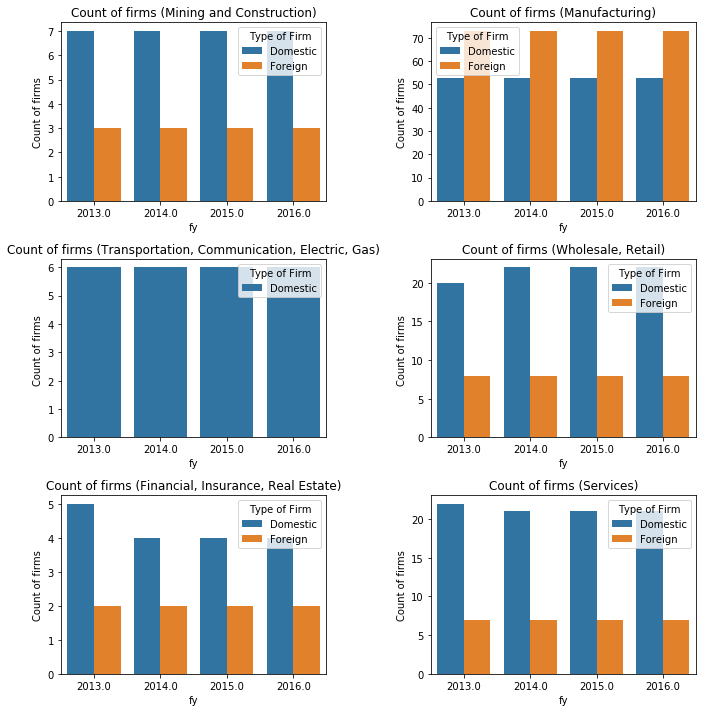

In [110]:
# Count of MNC and domestic firms throughout years for different industries

f, ((ax1, ax2), (ax3, ax4),(ax5,ax6))= plt.subplots(3,2, figsize=(10,10))

sns.barplot(x='fy',y='GrossProfit',hue='Type of Firm',data= total_income_industry1_count,ax=ax1)
# ax1.set_yticklabels([0,100,200,300,400,500,600,700])
ax1.set_ylabel('Count of firms')
ax1.set_title('Count of firms (Mining and Construction)')

sns.barplot(x='fy',y='GrossProfit',hue='Type of Firm',data= total_income_industry2_count,ax=ax2)
# ax2.set_yticklabels([0,1,2,3,4,5,6])
ax2.set_ylabel('Count of firms')
ax2.set_title('Count of firms (Manufacturing)')

sns.barplot(x='fy',y='GrossProfit',hue='Type of Firm',data= total_income_industry3_count,ax=ax3)
# ax3.set_yticklabels([0,1,2,3,4,5])
ax3.set_ylabel('Count of firms ')
ax3.set_title('Count of firms (Transportation, Communication, Electric, Gas)')

sns.barplot(x='fy',y='GrossProfit',hue='Type of Firm',data= total_income_industry4_count,ax=ax4)
# ax4.set_yticklabels([0,10,20,30,40,50,60,70])
ax4.set_ylabel('Count of firms ')
ax4.set_title('Count of firms (Wholesale, Retail)')

sns.barplot(x='fy',y='GrossProfit',hue='Type of Firm',data= total_income_industry5_count,ax=ax5)
# ax4.set_yticklabels([0,10,20,30,40,50,60,70])
ax5.set_ylabel('Count of firms')
ax5.set_title('Count of firms (Financial, Insurance, Real Estate)')

sns.barplot(x='fy',y='GrossProfit',hue='Type of Firm',data= total_income_industry6_count,ax=ax6)
# ax4.set_yticklabels([0,10,20,30,40,50,60,70])
ax6.set_ylabel('Count of firms')
ax6.set_title('Count of firms (Services)')

plt.tight_layout()

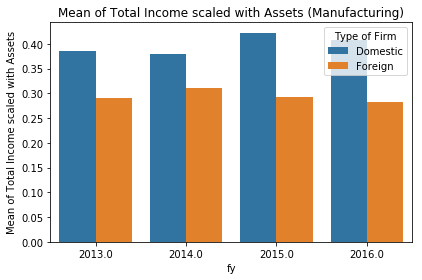

In [111]:
# Mean of (Total Income / Assets) for MNC and domestic firms throughout years for different industries

# plt.subplots(figsize=(5,5))

# sns.barplot(x='fy',y='Liabilities_scaled',hue='Type of Firm',data= liabilities_industry1_mean_scaled,ax=ax1)
# # ax1.set_yticklabels([0,100,200,300,400,500,600,700])
# ax1.set_ylabel('Mean Liabilities scaled with Assets')
# ax1.set_title('Mean Liabilities scaled with Assets (Mining and Construction)')

sns.barplot(x='fy',y='Total_Income_scaled',hue='Type of Firm',data= total_income_industry2_mean_scaled)
# ax2.set_yticklabels([0,1,2,3,4,5,6])
plt.ylabel('Mean of Total Income scaled with Assets')
plt.title('Mean of Total Income scaled with Assets (Manufacturing)')

# sns.barplot(x='fy',y='Liabilities_scaled',hue='Type of Firm',data= liabilities_industry3_mean_scaled,ax=ax3)
# # ax3.set_yticklabels([0,1,2,3,4,5])
# ax3.set_ylabel('Mean Liabilities scaled with Assets')
# ax3.set_title('Mean Liabilities scaled with Assets (Transportation, Communication, Electric, Gas)')

# sns.barplot(x='fy',y='Liabilities_scaled',hue='Type of Firm',data= liabilities_industry4_mean_scaled,ax=ax4)
# # ax4.set_yticklabels([0,10,20,30,40,50,60,70])
# ax4.set_ylabel('Mean Liabilities scaled with Assets')
# ax4.set_title('Mean Liabilities scaled with Assets (Wholesale, Retail)')

# sns.barplot(x='fy',y='Liabilities_scaled',hue='Type of Firm',data= liabilities_industry5_mean_scaled,ax=ax5)
# # ax4.set_yticklabels([0,10,20,30,40,50,60,70])
# ax5.set_ylabel('Mean Liabilities scaled with Assets')
# ax5.set_title('Mean Liabilities scaled with Assets (Financial, Insurance, Real Estate)')

# sns.barplot(x='fy',y='Liabilities_scaled',hue='Type of Firm',data= liabilities_industry6_mean_scaled,ax=ax2)
# # ax4.set_yticklabels([0,10,20,30,40,50,60,70])
# ax2.set_ylabel('Mean Liabilities scaled with Assets')
# ax2.set_title('Mean Liabilities scaled with Assets (Services)')

# sns.barplot(x='fy',y='Liabilities_scaled',hue='Type of Firm',data= liabilities_industry7_mean_scaled,ax=ax7)
# # ax4.set_yticklabels([0,10,20,30,40,50,60,70])
# ax7.set_ylabel('Mean Liabilities scaled with Assets (by millions)')
# ax7.set_title('Mean Liabilities scaled with Assets (Public Administration)')

plt.tight_layout()

Only Industry 2 (Manufacturing) have enough data points to analyze with (100+ observations for both domestic firms and MNCs), so we will be focusing on the manufacturing and will also plot the undistributed foreign earnings normalized by Assets below to see if the trend supports our hypothesis

In [112]:
total_income_industry2['UndistributedEarningsOfForeignSubsidiaries_scaled']=\
total_income_industry2['UndistributedEarningsOfForeignSubsidiaries']/total_income_industry2['Assets']

Text(0.5,1,'Difference in Mean of normalized Total Income for Manufacturing Industry (MNCs - Domestic Firms)')

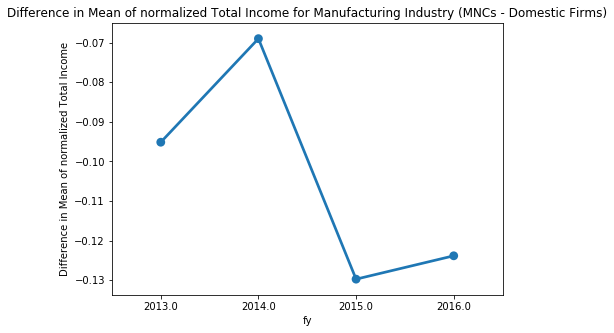

In [113]:
# Manufacturing industry : Difference of Mean normalized Total Income (MNCs - Domestic firms)
plt.subplots(figsize=(7,5))
sns.pointplot(x='fy',y='Total_Income_scaled',data= total_income_industry2_mean_diff)
plt.ylabel('Difference in Mean of normalized Total Income')
plt.title('Difference in Mean of normalized Total Income for Manufacturing Industry (MNCs - Domestic Firms)')

Text(0,0.5,'Mean of Total Income normalized')

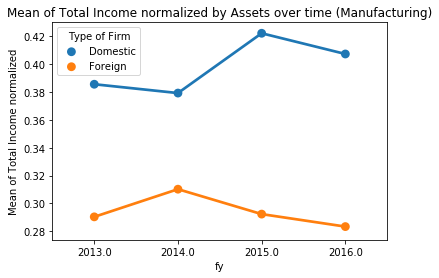

In [115]:
# Total Income normalized by Assets over time
sns.pointplot(x='fy', y='Total_Income_scaled', hue='Type of Firm', data=total_income_industry2_mean_scaled)

plt.title('Mean of Total Income normalized by Assets over time (Manufacturing)')
plt.ylabel('Mean of Total Income normalized')

Text(0,0.5,'Mean of Total Income normalized')

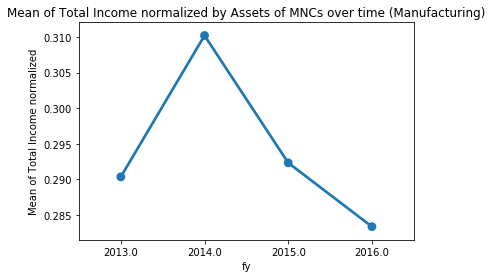

In [116]:
# Total Income normalized by Assets of MNCs over time
sns.pointplot(x='fy', y='Total_Income_scaled',
              data=total_income_industry2_mean_scaled[total_income_industry2_mean_scaled['Type of Firm']=='Foreign'])

plt.title('Mean of Total Income normalized by Assets of MNCs over time (Manufacturing)')
plt.ylabel('Mean of Total Income normalized')

Text(0.5,1,'Mean Undistributed Foreign Earnings normalized (Manufacturing)')

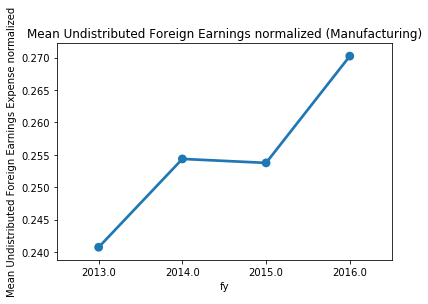

In [117]:
# Mean Normalized Undistributed Foreign Earnings of Manufacturing Industry

sns.pointplot(x='fy',y='UndistributedEarningsOfForeignSubsidiaries_scaled',
              data= pd.DataFrame(total_income_industry2[total_income_industry2['Type of Firm']=='Foreign'].\
             groupby(['fy'])['UndistributedEarningsOfForeignSubsidiaries_scaled'].mean()).reset_index())

plt.ylabel('Mean Undistributed Foreign Earnings Expense normalized')
plt.title('Mean Undistributed Foreign Earnings normalized (Manufacturing)')